### Import Dependancies:

In [25]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import imghdr

### Getting Started:

In [17]:
data_dir = 'data'

In [18]:
os.listdir(data_dir)

['happy', 'sad']

In [19]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '10-Habits-of-Happy-People-Seniors-Today.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1934412-happiness-1553188821.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1_617fd1e2590c2.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '220px-Happy_People_A_Year_in_the_Taiga_poster.jpg',
 '2560px-Happy_People.jpg',
 '30483hd.jpg',
 '35438_hd.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '81Vk4C.jpg',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 '9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg',
 'A_Sep20_14_1189155141.jpg',
 'blog-2.jpeg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'cheerful-middle-eastern-family-three-260nw-1936256839.jpg',
 'compassion-900x387.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'file-20230208-27-3jttof.jpg',
 'friends-happy-190821.jpg',
 'friends_1904

In [20]:
img = cv2.imread(os.path.join('data','happy','05-12-21-happy-people.jpg'))
img

array([[[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [241, 238, 240],
        [241, 238, 240],
        [241, 238, 240]],

       [[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [241, 238, 240],
        [241, 238, 240],
        [241, 238, 240]],

       [[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [241, 238, 240],
        [241, 238, 240],
        [241, 238, 240]],

       ...,

       [[157, 131,  84],
        [165, 139,  92],
        [172, 148, 102],
        ...,
        [191, 189, 181],
        [191, 189, 181],
        [191, 189, 181]],

       [[162, 136,  89],
        [170, 144,  97],
        [177, 153, 107],
        ...,
        [191, 189, 181],
        [191, 189, 181],
        [191, 189, 181]],

       [[159, 133,  86],
        [169, 143,  96],
        [178, 154, 108],
        ...,
        [191, 189, 181],
        [191, 189, 181],
        [191, 189, 181]]

In [21]:
img.shape

(880, 1400, 3)

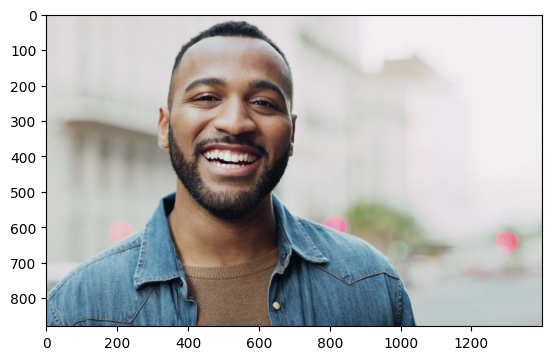

In [22]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

### 1. Remove Bad / Dodgy Images: 

In [23]:
img_extensions = ['jpeg','png','jpg','bmp']
img_extensions

['jpeg', 'png', 'jpg', 'bmp']

In [24]:
## Looping through data folder
for image_class in os.listdir(data_dir):
    ## Looping throught each image in each folder in data
    for image in os.listdir(os.path.join(data_dir,image_class)):
        ## Getting Image path
        image_path = os.path.join(data_dir,image_class,image)
        try:
            ## Loading Image
            img = cv2.imread(image_path)
            ## Checking Image Extensions
            extension = imghdr.what(image_path)
            ## If Image extension not from the above list
            if extension not in img_extensions:
                print(f"Image extension not in extensions - Image: {image_path}")
                ## Remove the image
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with Image: {image_path}")

Image extension not in extensions - Image: data\happy\220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
Image extension not in extensions - Image: data\happy\2560px-Happy_People.jpg
Image extension not in extensions - Image: data\happy\56f455011e0000b300705475.jpeg
Image extension not in extensions - Image: data\happy\cheerful-middle-eastern-family-three-260nw-1936256839.jpg
Image extension not in extensions - Image: data\happy\guilherme-stecanella-375176-unsplash.jpg
Image extension not in extensions - Image: data\happy\happiness_thumbnail.jpg
Image extension not in extensions - Image: data\happy\Happy20People.jpg
Image extension not in extensions - Image: data\happy\portrait-happy-young-black-woman-260nw-576995383.jpg
Image extension not in extensions - Image: data\happy\portrait-smiling-young-friends-walking-260nw-1392193913.jpg
Image extension not in extensions - Image: data\sad\2bnso9uiwlhrikrx.jpg
Image extension not in extensions - Image: data\sad\2_still_2x.gif
Image extension 

### 2. Load Data:

In [176]:
## Bulding our data Pipeline
data = tf.keras.utils.image_dataset_from_directory('data')

Found 161 files belonging to 2 classes.


- We can't access the data directly So we have to convert it to numpy_iterator

In [177]:
## Accessing Data Pipeline
data_itrator = data.as_numpy_iterator()

In [178]:
data_itrator

In [179]:
## Grabbing batch from data Pipeline
batch = data_itrator.next()

In [180]:
batch

(array([[[[229.       , 229.       , 227.       ],
          [230.       , 230.       , 228.       ],
          [230.       , 230.       , 228.       ],
          ...,
          [242.       , 242.       , 242.       ],
          [242.       , 242.       , 242.       ],
          [242.       , 242.       , 242.       ]],
 
         [[229.       , 229.       , 227.       ],
          [229.       , 229.       , 227.       ],
          [230.       , 230.       , 228.       ],
          ...,
          [242.       , 242.       , 242.       ],
          [242.       , 242.       , 242.       ],
          [242.       , 242.       , 242.       ]],
 
         [[229.       , 229.       , 227.       ],
          [229.       , 229.       , 227.       ],
          [229.875    , 229.875    , 227.875    ],
          ...,
          [242.       , 242.       , 242.       ],
          [242.       , 242.       , 242.       ],
          [242.       , 242.       , 242.       ]],
 
         ...,
 
         [[2

In [181]:
len(batch)

2

- The shape of two is bcs it contains images and than there labels as 0 and 1

In [182]:
batch[0].shape

(32, 256, 256, 3)

- So in first batch we have 32 images of 256x256 size

In [183]:
## Labels
batch[1]

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

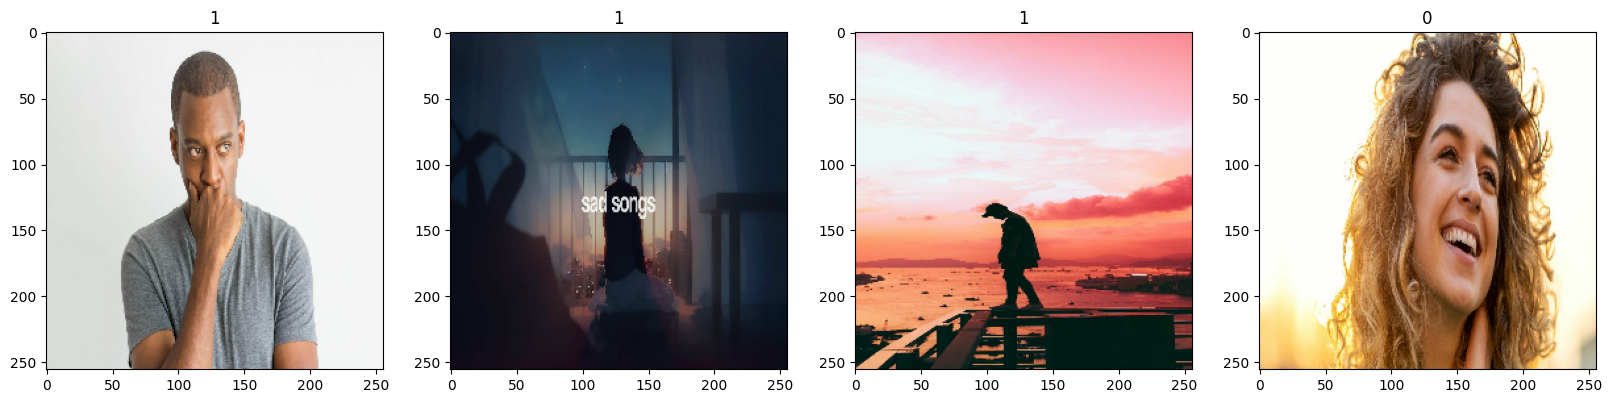

In [184]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

- So 0 for happy people and 1 for sad people

### 3. Data Preprocessing:

#### 3.1 Scale Data:
- Scaling data b/w 0 and 1

In [185]:
scaled = data.map(lambda x,y: (x / 255 , y))

In [186]:
scaled_iterator = scaled.as_numpy_iterator()

In [187]:
batch = scaled_iterator.next()

In [188]:
batch[0].max()

1.0

#### 3.2 Split Data:

In [189]:
len(scaled)

6

In [190]:
train_size = int(len(scaled)*.7) 
val_size = int(len(scaled)*.2)
test_size = int(len(scaled)*.1)+1

- Setting the size of train, val and test data

In [191]:
train_size

4

- So train data will have 4 batches

In [192]:
train_size+test_size+val_size

6

In [193]:
train = scaled.take(train_size)
val = scaled.skip(train_size).take(val_size)
test = scaled.skip(train_size+val_size).take(test_size)

- Split the data

In [103]:
len(test)

1

### 4. Model Building:

In [196]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [197]:
model = Sequential()

In [198]:
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [199]:
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [200]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

#### 4.1 Train:

In [201]:
logdir = 'logs'

In [202]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [203]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 15s 3s/step - loss: 1.6324 - accuracy: 0.5156 - val_loss: 1.2881 - val_accuracy: 0.4062
Epoch 2/20
4/4 [==============================] - 12s 3s/step - loss: 0.8534 - accuracy: 0.4766 - val_loss: 0.6217 - val_accuracy: 0.6250
Epoch 3/20
4/4 [==============================] - 10s 2s/step - loss: 0.6318 - accuracy: 0.6094 - val_loss: 0.6239 - val_accuracy: 0.5938
Epoch 4/20
4/4 [==============================] - 10s 2s/step - loss: 0.6485 - accuracy: 0.6016 - val_loss: 0.6402 - val_accuracy: 0.6562
Epoch 5/20
4/4 [==============================] - 10s 2s/step - loss: 0.6085 - accuracy: 0.7656 - val_loss: 0.4624 - val_accuracy: 0.7812
Epoch 6/20
4/4 [==============================] - 11s 2s/step - loss: 0.5965 - accuracy: 0.6406 - val_loss: 0.5396 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 12s 3s/step - loss: 0.5352 - accuracy: 0.8438 - val_loss: 0.4302 - val_accuracy: 0.8750
Epoch 8/20
4/4 [==================

#### 4.2 Plot Performance:

In [204]:
hist.history

{'loss': [1.6323505640029907,
  0.8533602356910706,
  0.6317591667175293,
  0.6484656929969788,
  0.608526885509491,
  0.596513569355011,
  0.5351801514625549,
  0.4575563073158264,
  0.4112892150878906,
  0.2953726053237915,
  0.27729111909866333,
  0.20187360048294067,
  0.13086727261543274,
  0.08435995876789093,
  0.08006459474563599,
  0.03391975164413452,
  0.03169592097401619,
  0.0171650480479002,
  0.01257350668311119,
  0.004561539739370346],
 'accuracy': [0.515625,
  0.4765625,
  0.609375,
  0.6015625,
  0.765625,
  0.640625,
  0.84375,
  0.75,
  0.8671875,
  0.8828125,
  0.8984375,
  0.96875,
  0.984375,
  0.984375,
  0.9765625,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.2881351709365845,
  0.6216633915901184,
  0.6238846778869629,
  0.640205979347229,
  0.4623638987541199,
  0.5396395325660706,
  0.43015965819358826,
  0.3589072823524475,
  0.30966687202453613,
  0.3103720247745514,
  0.18550291657447815,
  0.13082846999168396,
  0.07980168610811234,
  0.091023385

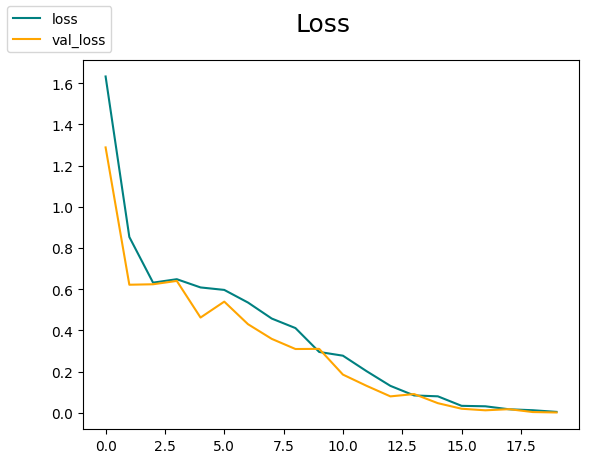

In [205]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss',fontsize=18)
fig.legend(loc='upper left')
plt.show()

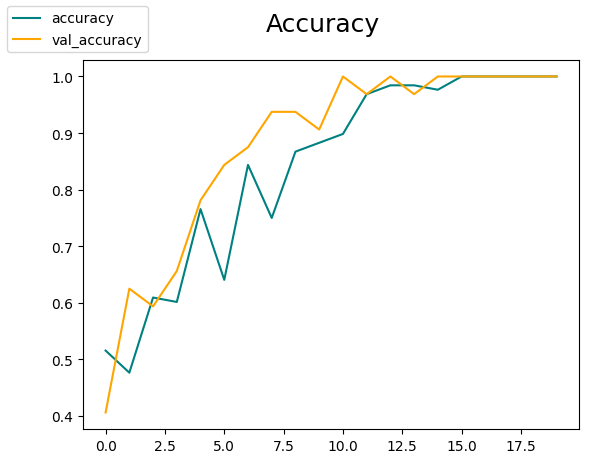

In [206]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize=18)
fig.legend(loc='upper left')
plt.show()

### 5. Evaluate Performance

#### 5.1 Evaluate

In [207]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [208]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [209]:
for batch in test.as_numpy_iterator():
    X,y = batch
    y_predict = model.predict(X)
    pre.update_state(y,y_predict)
    re.update_state(y,y_predict)
    acc.update_state(y,y_predict)

1/1 [==============================] - 0s 94ms/step


In [210]:
y

array([0])

In [211]:
y_predict

array([[0.00240146]], dtype=float32)

In [212]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 0.0, Recall: 0.0, Accuracy: 1.0


#### 5.2 Test:

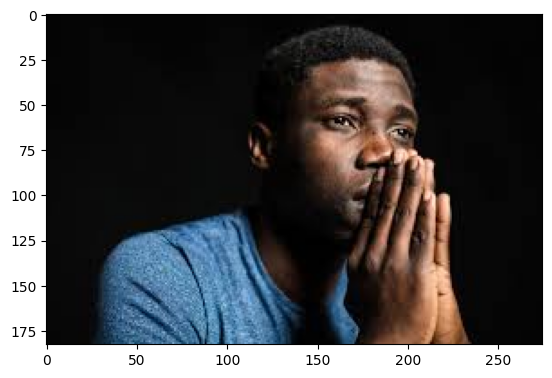

In [256]:
img = cv2.imread('sadtest.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb)
plt.show()

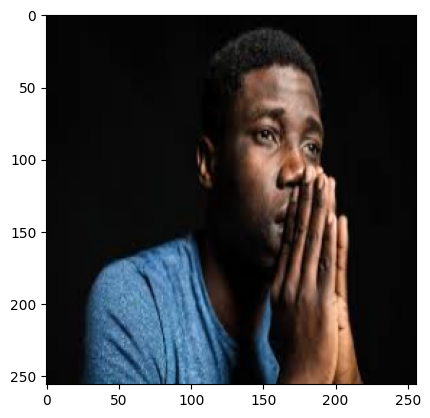

In [257]:
resize = tf.image.resize(img_rgb,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [258]:
ypred = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 61ms/step


In [259]:
ypred

array([[0.984535]], dtype=float32)

In [260]:
if ypred > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is happy')

Predicted class is Sad


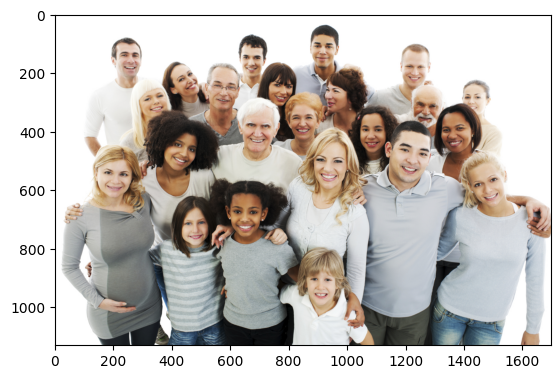

In [239]:
img = cv2.imread('data/happy/SERVICES-IMAGE-iStock_000019224446Medium.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb)
plt.show()

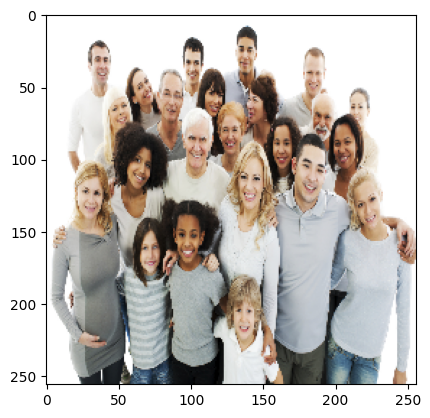

In [240]:
resize = tf.image.resize(img_rgb,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [241]:
ypred = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 57ms/step


In [242]:
ypred

array([[0.00129051]], dtype=float32)

In [243]:
if ypred > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy


### 6. Save Model:

In [249]:
from tensorflow.keras.models import load_model

In [250]:
model.save(os.path.join('models','happysadmodel.h5'))

In [252]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [253]:
new_model

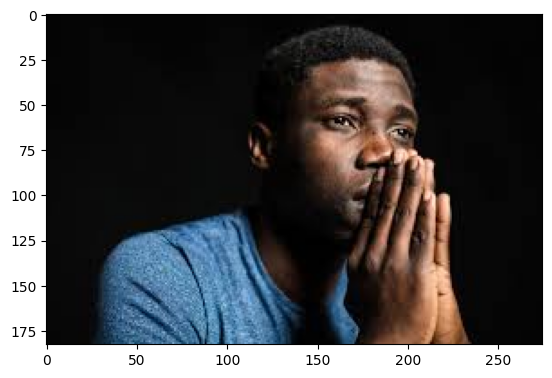

In [261]:
img = cv2.imread('sadtest.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb)
plt.show()

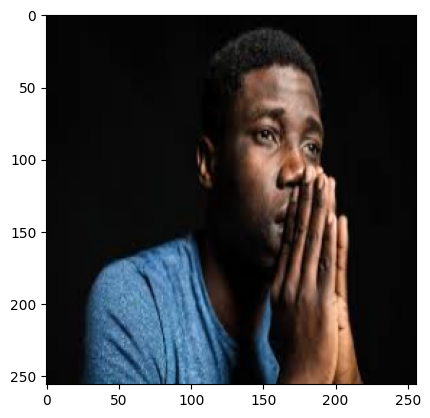

In [262]:
resize = tf.image.resize(img_rgb,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [263]:
ypred = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 44ms/step


In [264]:
ypred

array([[0.984535]], dtype=float32)

In [265]:
if ypred > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is happy')

Predicted class is Sad
